#  Cats and Dogs



In [1]:
%matplotlib inline

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import vgg16; reload(vgg16)

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


<module 'vgg16' from 'vgg16.pyc'>

In [3]:
import utils; reload(utils)
from utils import plots

In [81]:
path = "../data/dogscats/"
#path = "../data/dogscats/sample/"

In [82]:
batch_size = 90
epochs = 1
vg = vgg16.Vgg16()

In [83]:
train = vg.get_batches(path+"/train", batch_size=batch_size)
valid = vg.get_batches(path+"/valid", batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


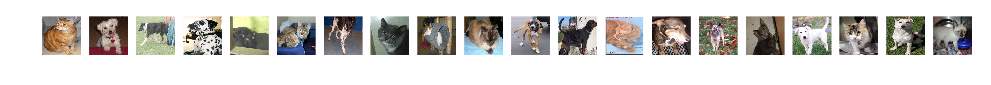

In [78]:
img, labs = next(train)
plots(img)

(3, 224, 224)


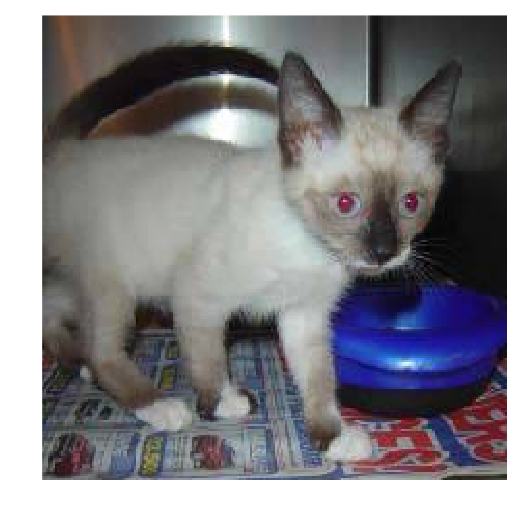

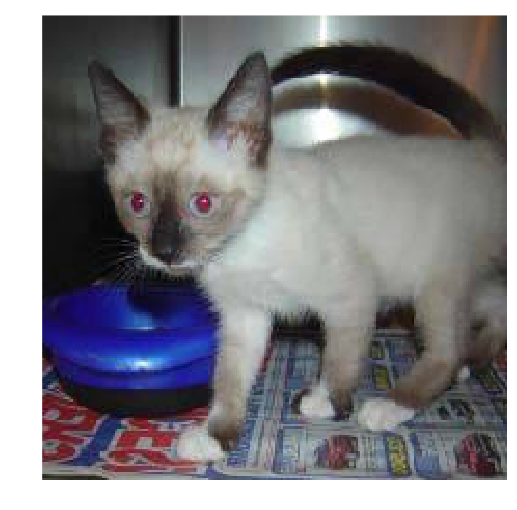

In [57]:
img1 = img[0]
print(img1.shape)
img1_r = invert_img(img1) #No Need to define your own function to flip the images, keras has the library doing this
#print(img1_r)
plots([img1])
plots([img1_r])

def invert_img(img):
    depths, nrows, ncols = img.shape
    #print(type(img1), nrows, ncols)
    img_r = np.ndarray([depths, nrows, ncols])
    for m in range(depths):
        for i in range(nrows):
            for j in range(ncols):
                img_r[m][i][j] = img[m][i][ncols-1-j]
                
    #plots([img_r])
    return img_r
    


In [44]:
#Generte Rotated Images
print(train.shape)

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

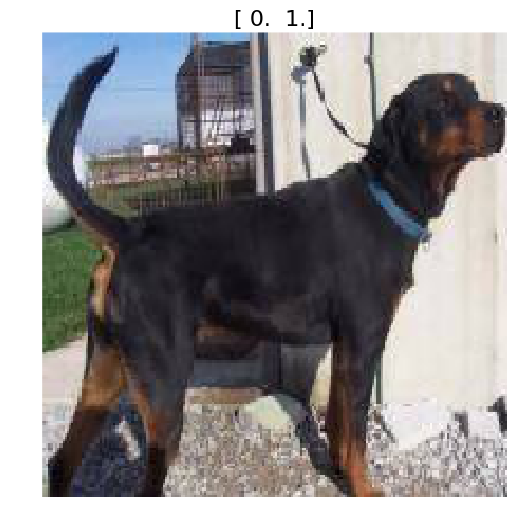

In [12]:
plots([img1], titles=labs)

In [84]:
vg.finetune(train)
vg.fit(train, valid, epochs)

Epoch 1/1
23000/23000 [==============================] - 650s - loss: 0.1252 - acc: 0.9662 - val_loss: 0.0583 - val_acc: 0.9815


In [85]:
#Train on flipped images
from keras.preprocessing import image
train_flipped_horiz = vg.get_batches(path+"/train", batch_size=batch_size, gen=image.ImageDataGenerator(horizontal_flip=True))

Found 23000 images belonging to 2 classes.


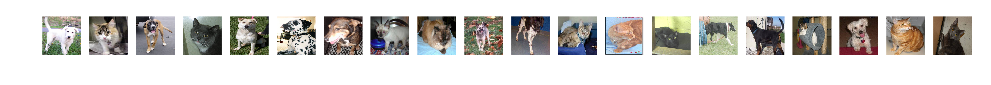

In [77]:
imgs, labels = next(train_flipped_horiz)
plots(imgs)

In [86]:
vg.fit(train_flipped_horiz, valid, epochs)

Epoch 1/1
23000/23000 [==============================] - 651s - loss: 0.0826 - acc: 0.9787 - val_loss: 0.0629 - val_acc: 0.9790


In [ ]:
#Effects of adding flipped images into training
#Additional images[Raw, horizontal-flipped, ]
num_of_train_samples = [23000, 46000]
train_loss_arr = [0.1251, 0.0826]
train_acc_arr = [0.9662, 0.9787]
valid_loss_arr = [0.0583, 0.0629]
valid_acc_arr = [0.9815, 0.979]
test_score = [0.17722, 0.17860 ] #This can't be used to select batch size
plt.plot(num_of_train_samples, train_loss_arr, 'ro', num_of_train_samples, valid_loss_arr, 'bs', num_of_train_samples, test_score, 'g^')
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.show()

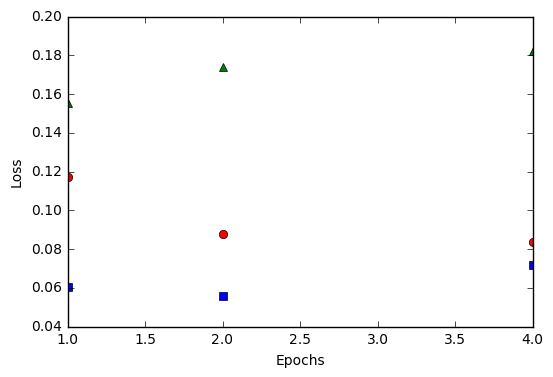

In [31]:
#Effects of epoches, batch_size is fixed at 90
# Looks like epoch=1 is best for me. I didn't do randomization of picture
#Why do people run multiple epoches? 
epoch_arr = [1.0, 2.0, 4.0]
train_loss_arr = [0.1170, 0.0876, 0.0837]
train_acc_arr = [0.9675,0.9792, 0.9798]
valid_loss_arr = [0.0606, 0.0557, 0.0717]
valid_acc_arr = [0.9815, 0.9815, 0.9805]
test_score = [0.15558, 0.17402, 0.18207] #This can't be used to select batch size
plt.plot(epoch_arr, train_loss_arr, 'ro', epoch_arr, valid_loss_arr, 'bs', epoch_arr, test_score, 'g^')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

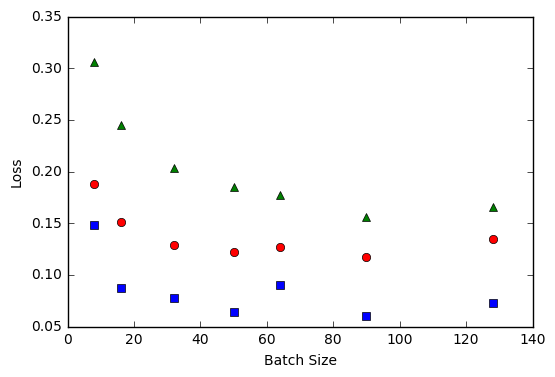

In [13]:
#Effects of batch size, I picked 90 as an optimized sample size according to train/valid data
#batch_size = 200 got out of memory error
batch_arr = [64, 32, 16, 8, 50, 128, 90]
train_loss_arr = [0.1269, 0.1287, 0.1511, 0.1883, 0.122, 0.1348, 0.1170]
train_acc_arr = [0.9664, 0.9692, 0.9705, 0.9694, 0.9692, 0.9642, 0.9675]
valid_loss_arr = [0.0902, 0.0771, 0.0868, 0.1481, 0.0636, 0.0726, 0.0606]
valid_acc_arr = [0.9735, 0.9800, 0.9820, 0.9795, 0.9815, 0.979, 0.9815]
test_score = [0.17722, 0.20386,0.24529, 0.30568, 0.18521, 0.16582, 0.15558] #This can't be used to select batch size
plt.plot(batch_arr, train_loss_arr, 'ro', batch_arr, valid_loss_arr, 'bs', batch_arr, test_score, 'g^')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.show()


In [87]:
test_path = path+"/test"
print(test_path)

../data/dogscats//test


In [28]:
vg.classes

['cats', 'dogs']

In [88]:
test = vg.get_batches(test_path, batch_size=batch_size, class_mode=None, shuffle=False)

Found 12500 images belonging to 1 classes.


(20, 3, 224, 224)

In [30]:
test_imgs = next(test)
res = vg.predict(test_imgs)
len(test_imgs)

10

(3, 224, 224)


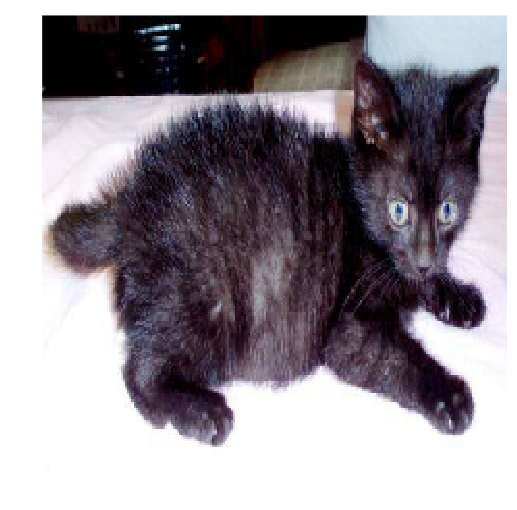

In [44]:
img1 = test_imgs[0]
print(img1.shape)
img1
plots([img1])

In [89]:
import pandas as pd
fns = []
dog_probs = []
batch_nums = int(len(test.filenames)/batch_size+1)
start_fid = 0
print("Total number of files:%d"%len(test.filenames))
print("Total batches: %d"%batch_nums)
for batch_id in range(batch_nums):
    fids = range(start_fid, start_fid + batch_size)
    fids = [f for f in fids if f < len(test.filenames)]
    if len(fids) <= 0:
        break;
    test_imgs = next(test)
    batch_preds = vg.predict(test_imgs)
    batch_probs = batch_preds[0]
    batch_classes = batch_preds[1]
    if batch_id % 50 == 0:
        print("Current batch id = %d"%batch_id)
    if len(batch_probs) != batch_size:
        print("Batch id = %d, Batch size = %d"%(batch_id, len(batch_probs)))
    for ik in range(len(batch_probs)):
        #print("ik = %d, fid = %d"%(ik,fids[ik]))
        fn = test.filenames[fids[ik]]
        fn = fn.split("/")[1].split(".")[0] #Get file ID
        fns.append(fn)
        prob = batch_probs[ik]
        if batch_classes[ik] == 0: #cat
            prob = 1.0 - batch_probs[ik]
        #print(fn)
        dog_probs.append(prob)
    start_fid = start_fid + batch_size
    #print(start_fid)

#print("File names: %s"%fns)
#print("Dog probabilities: %s"%dog_probs)
df = pd.DataFrame({"id":fns, "label":dog_probs})
#print(df)
df.to_csv(path+"/neil_submission_batch" +str(batch_size) + "_samples2" + ".csv", index=False)
print("DONE!")

Total number of files:12500
Total batches: 139
Current batch id = 0
Current batch id = 50
Current batch id = 100
Batch id = 138, Batch size = 80
DONE!


In [106]:
df = pd.DataFrame({"id":fns, "label":dog_probs})
#print(df)
df.to_csv(path+"/neil_submission_batch" +str(batch_size) + "_epochs" + str(epochs) + ".csv", index=False)
print("DONE!")

DONE!


In [83]:
df.to_csv(path+"/neil_submission_batch" +str(batch_size) + "_epochs" + str(epochs) + ".csv", index=False)


In [17]:
from os import listdir
from os.path import isfile, join
from keras.preprocessing import image
import vgg16 as vg
onlyfiles = [f for f in listdir(test_path) if isfile(join(test_path, f))]
igen = image.ImageDataGenerator()
for fname in onlyfiles:
    print(fname)
    img = image.load_img(os.path.join(test_path, fname),grayscale=False, target_size=(224,224))
    x = image.img_to_array(img)
    x = igen.random_transform(x)
    x = igen.standardize(x)
    x = vg.vgg_preprocess(x)
    print(len(x))
    break



9688.jpg
3


In [137]:
onlyfiles

['10001.jpg',
 '10002.jpg',
 '10008.jpg',
 '10005.jpg',
 '10003.jpg',
 '10006.jpg',
 '10000.jpg',
 '10004.jpg',
 '10009.jpg',
 '10007.jpg']